# Configurações iniciais para a definição do melhor modelo

In [ ]:
# Importando as bibliotecas necessárias para a modelagem
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from IPython.display import clear_output

# Importando a biblioteca para o KNN
from sklearn.neighbors import KNeighborsClassifier




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
final_table = pd.read_excel('/content/drive/MyDrive/database/database.xlsx')

## 4.0 KNN

###4.4.1 Separando a tabela para treino

In [ ]:
# Criando um dataframe com somente os dados de entrada.
xKNN = final_table.loc[:, final_table.columns!='overall_survive']

# Criando um dataframe com somente o atributo alvo.
yKNN = final_table.loc[:, final_table.columns=='overall_survive']

### 4.4.2 KNN - Construíndo um modelo sem os melhores parametros possíveis (Sem RandomSearch) e mostrando os resultados obtidos:

In [ ]:
# Dividindo os dados entre treino e teste e definindo o tamanho dos dados de teste como 30%.
x_train_KNN, x_test_KNN, y_train_KNN, y_test_KNN = train_test_split(xKNN, yKNN, test_size=0.3, random_state=52)

# Instanciando o modelo.
kNN = KNeighborsClassifier()

# Treinando o modelo de busca
kNN.fit(x_train_KNN, y_train_KNN)

# Associando resultado.
y_pred_KNN_no_tuning = kNN.predict(x_test_KNN)

# Limpando o console de saída.
clear_output()

Análise dos resultados obtidos:

Acurácia: 72.52%
Precisão: 76.77%
Erro Quadrático: 38.76%
Recall: 69.25%
Segue a Matriz de Confusão: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


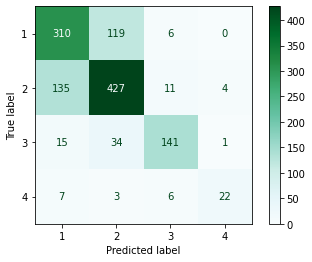

In [ ]:
# Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test_KNN, y_pred_KNN_no_tuning) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test_KNN, y_pred_KNN_no_tuning, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test_KNN, y_pred_KNN_no_tuning) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test_KNN, y_pred_KNN_no_tuning, average='macro') * 100))

# Plotando a matriz de confusão.
print("Segue a Matriz de Confusão: ")
_ = plot_confusion_matrix(kNN, x_test_KNN, y_test_KNN, cmap='BuGn')

### 4.4.3 KNN - Construíndo um modelo com os melhores parametros possíveis (Com RandomSearch) e mostrando os resultados obtidos:

In [ ]:
# Definindo os parâmetros para o randomSearch
params = {
    'n_neighbors': range(5,35),
    'weights': ['uniform', 'distance'],
}

# Instanciando o modelo de busca 

search = RandomizedSearchCV(
    estimator = kNN,
    param_distributions = params
)

# Treinando o modelo de busca
kNN_model1 = search.fit(x_train_KNN, y_train_KNN)

clear_output()

# Associando resultado.
y_pred_KNN = kNN_model1.predict(x_test_KNN)

# Mostrando os melhores parâmetros
kNN_model1.best_params_

{'weights': 'uniform', 'n_neighbors': 18}

Análise dos resultados obtidos:

Acurácia: 74.54%
Precisão: 78.42%
Erro Quadrático: 33.68%
Recall: 72.01%
Segue a Matriz de Confusão: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


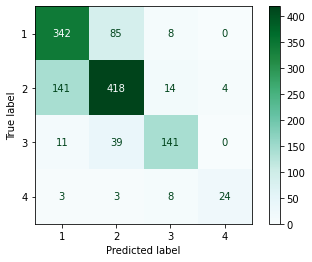

In [ ]:
# Verificando a pontuação de classificação de precisão.
print("Acurácia: {:.2f}%".format(accuracy_score(y_test_KNN, y_pred_KNN) * 100))
print("Precisão: {:.2f}%".format(precision_score(y_test_KNN, y_pred_KNN, average='macro') * 100))
print("Erro Quadrático: {:.2f}%".format(mean_squared_error(y_test_KNN, y_pred_KNN) * 100))
print("Recall: {:.2f}%".format(recall_score(y_test_KNN, y_pred_KNN, average='macro') * 100))

# Plotando a matriz de confusão.
print("Segue a Matriz de Confusão: ")
_ = plot_confusion_matrix(kNN_model1, x_test_KNN, y_test_KNN, cmap='BuGn')